In [77]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [78]:
#Load in files
with open("optimization_full.pkl", "rb") as fid:
    optimization = pickle.load(fid)
    
with open("objective_full.pkl", "rb") as fid:
    objective = pickle.load(fid)
    
with open("simulation_full.pkl", "rb") as fid:
    simulation = pickle.load(fid)

In [79]:
#Print returned optimization output
optimization

,mut_rate,cov_rate,Fitness,Convergence
0,0.020359,0.533716,-69.857516,6.0
1,0.667347,0.629725,-69.989871,7.0


In [80]:
#Create DF for objective data, adding a boolean column for successes
objectiveDF = pd.DataFrame.from_records(objective, columns=['Mutation Rate','Crossover Rate','Fitness','Convergence'])
objectiveDF['Convergence'] = objectiveDF['Convergence'].astype(int)
objectiveDF['success'] = objectiveDF['Fitness'] < -69.98987
objectiveDF

,mut_rate,cov_rate,Fitness,Convergence,success
0,0.136313,0.432840,-69.976836,33,False
1,0.192636,0.275923,-69.989871,27,True
2,0.018915,0.235981,-69.898842,13,False
3,0.046580,0.111788,-69.898842,28,False
4,0.508255,0.528446,-69.989871,18,True
...,...,...,...,...,...
295,0.271516,0.400353,-69.989871,21,True
296,0.315982,0.394157,-69.989871,19,True
297,0.324964,0.402203,-69.989871,20,True
298,0.323092,0.396219,-69.989871,17,True


In [81]:
# Create dataframes based on success
successes = objectiveDF[objectiveDF['Fitness'] < -69.98987]
failures = objectiveDF[objectiveDF['Fitness'] > -69.98987]

In [82]:
# Calculate averages for successful simulations
print("Average mutation rate for success:",successes['mut_rate'].mean())
print("Average crossover rate for success:",successes['cov_rate'].mean())
print("Average convergence rate for success:",successes['Convergence'].mean())

Average mutation rate for success: 0.48272241655284626
Average crossover rate for success: 0.5110659510774898
Average convergence rate for success: 17.814545454545456


In [83]:
# Look at averages by convergence
successes.groupby('Convergence').mean()

,mut_rate,cov_rate,Fitness,success
Convergence,,,,
7,0.661258,0.628121,-69.989871,1.0
10,0.668943,0.592886,-69.989871,1.0
11,0.651923,0.664174,-69.989871,1.0
12,0.664664,0.608555,-69.989871,1.0
13,0.720886,0.580400,-69.989871,1.0
14,0.535051,0.665310,-69.989871,1.0
15,0.486262,0.510681,-69.989871,1.0
16,0.411194,0.545623,-69.989871,1.0
17,0.426942,0.520651,-69.989871,1.0


[Text(0.5, 1.0, 'Convergence vs. Fitness for All Simulations')]

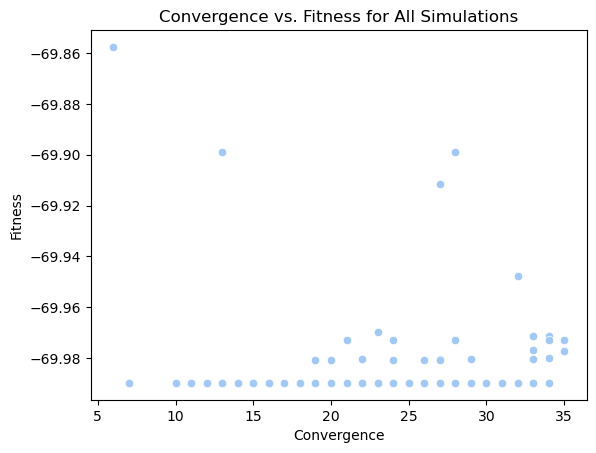

In [84]:
# Build a scatter plot of convergence vs. fitness
sns.scatterplot(x='Convergence', y='Fitness', data= objectiveDF).set(title='Convergence vs. Fitness for All Simulations')

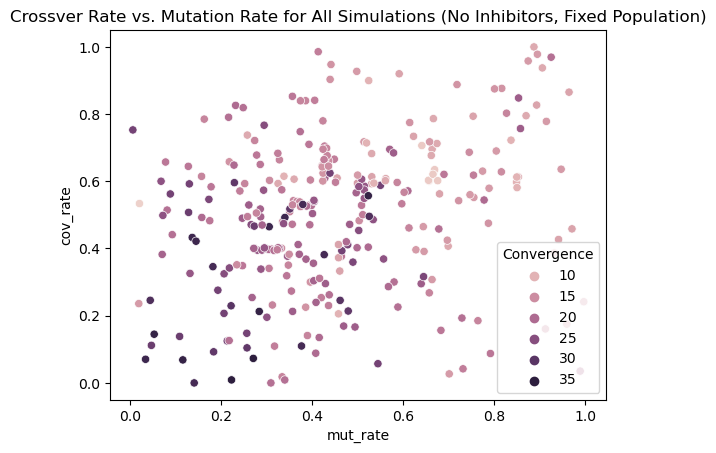

In [85]:
# Loot at convergence by mutation and crossover rate
sns.set_palette("pastel")
sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF,
                hue = 'Convergence').set(title='Crossver Rate vs. Mutation Rate for All Simulations (No Inhibitors, Fixed Population)')
plt.savefig('Convergence_full')

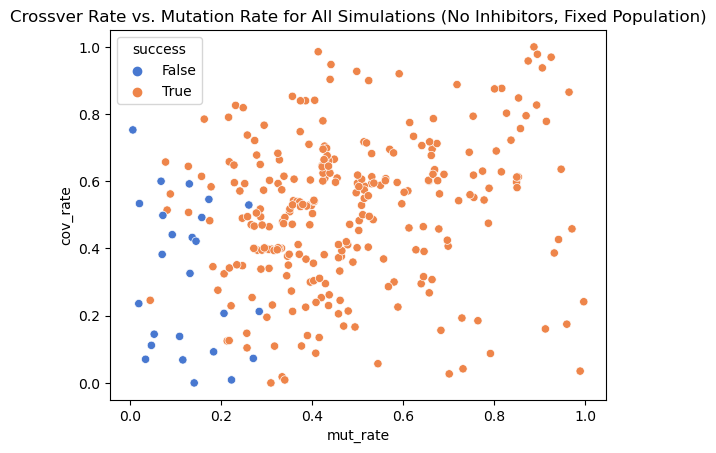

In [86]:
# Loot at success by mutation and crossover rate
colors = ["Orange","Blue"]
sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF, 
                hue = 'success', palette = "muted").set(title='Crossver Rate vs. Mutation Rate for All Simulations (No Inhibitors, Fixed Population)')
plt.savefig('Success_full')

## Build plots to explore successful simulations

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Successful Simulations')]

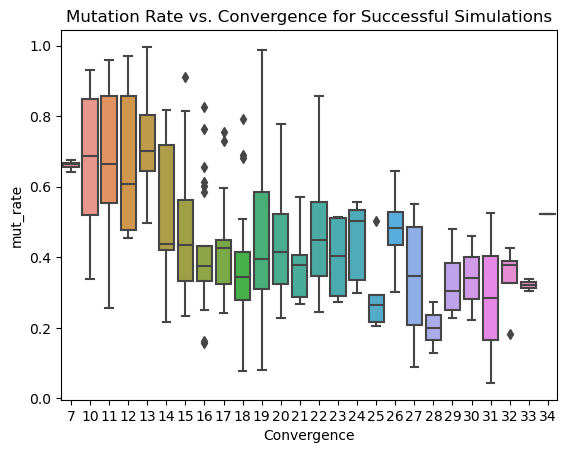

In [87]:
# Look at the distribution of mutation rate by convergence for successful simulations
sns.boxplot(x='Convergence', y='mut_rate', data= successes).set(title='Mutation Rate vs. Convergence for Successful Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Successful Simulations')]

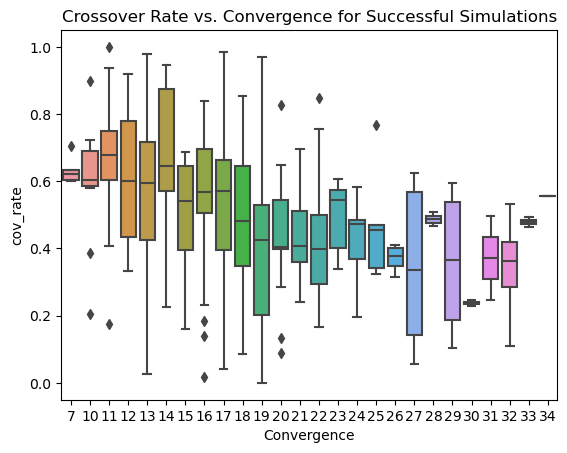

In [88]:
# Look at the distribution of crossover rate by convergence for successful simulations
sns.boxplot(x='Convergence', y='cov_rate', data= successes).set(title='Crossover Rate vs. Convergence for Successful Simulations')

In [89]:
# Group the data by convergence
groups_size = pd.DataFrame(successes.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Successful Simulations by Convergence')]

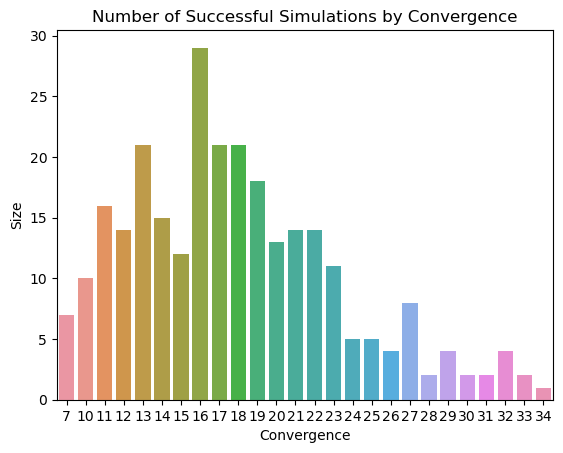

In [90]:
# Count the number of successful simulations by convergence
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Successful Simulations by Convergence')

## Build the same plots for failed simulations

[Text(0.5, 1.0, 'Convergence vs. Fitness for Failed Simulations')]

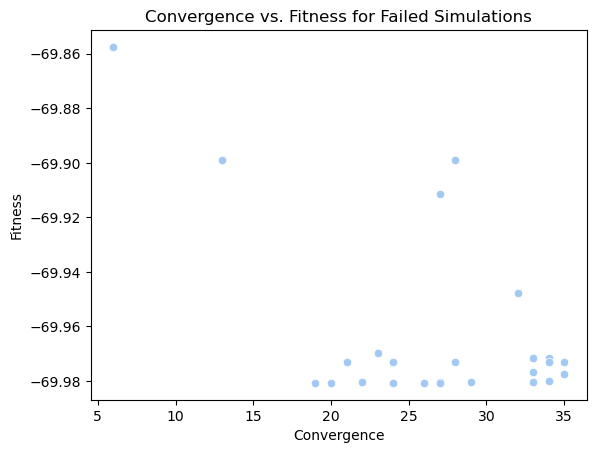

In [91]:
sns.scatterplot(x='Convergence', y='Fitness', data= failures).set(title='Convergence vs. Fitness for Failed Simulations')

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Failed Simulations')]

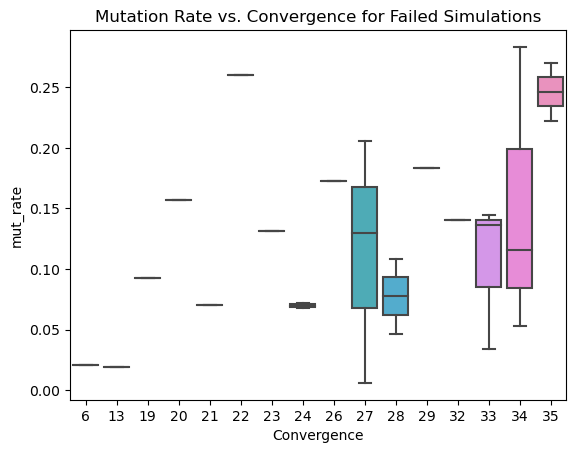

In [92]:
sns.boxplot(x='Convergence', y='mut_rate', data= failures).set(title='Mutation Rate vs. Convergence for Failed Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Failed Simulations')]

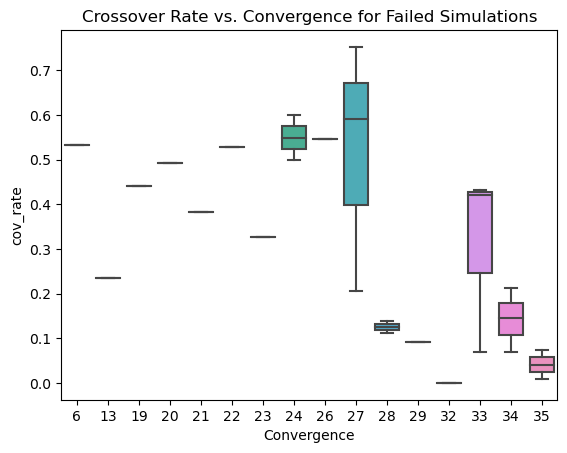

In [93]:
sns.boxplot(x='Convergence', y='cov_rate', data= failures).set(title='Crossover Rate vs. Convergence for Failed Simulations')

In [94]:
groups_size = pd.DataFrame(failures.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Failed Simulations by Convergence')]

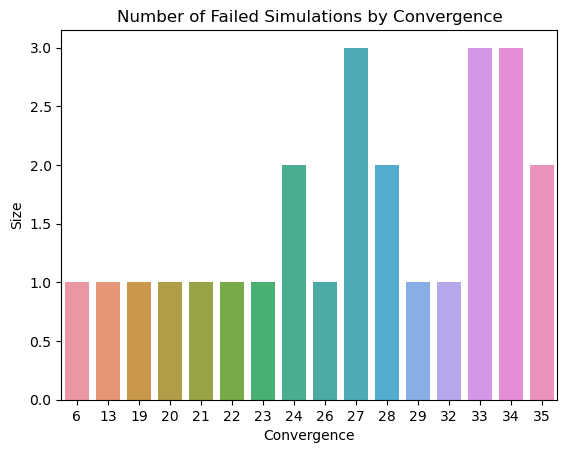

In [95]:
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Failed Simulations by Convergence')